# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [322]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [323]:
#Read in data from source 
df_raw = pd.read_csv("assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [324]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 unique entries.

#### Question 2. Create a summary table

In [325]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [326]:
df_raw.groupby(['admit'])['gre'].mean()

admit
0    573.579336
1    618.897638
Name: gre, dtype: float64

In [327]:
df_raw.groupby(['admit'])['gpa'].mean()

admit
0    3.345404
1    3.489206
Name: gpa, dtype: float64

In [328]:
df_raw.groupby(['prestige'])['gre'].mean()

prestige
1.0    611.803279
2.0    596.621622
3.0    574.876033
4.0    570.149254
Name: gre, dtype: float64

In [329]:
df_raw.groupby(['prestige'])['gpa'].mean()

prestige
1.0    3.453115
2.0    3.364027
3.0    3.432893
4.0    3.318358
Name: gpa, dtype: float64

#### Question 3. Why would GRE have a larger STD than GPA?

In [330]:
df_raw['gpa'].std(skipna=True)

0.3806303800566138

In [331]:
df_raw['gre'].std(skipna=True)

115.62851309152948

Answer: GRE and GPA measure completely different values. Stdev is not normalized. Therefore GRE measuring higher values (range ~200 - 800) than GPA (~2.0 - 4.0) will yield higher stdev.

#### Question 4. Drop data points with missing data


In [332]:
df_raw = df_raw.dropna()

In [333]:
df_raw.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Compared the describe method on df_raw to the original. 397 entries now exist, which all have complete values for all columns. 

#### Question 6. Create box plots for GRE and GPA

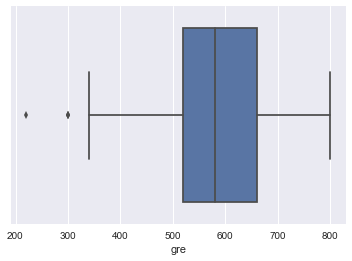

In [334]:
import seaborn as sns
sns.boxplot(df_raw['gre'])

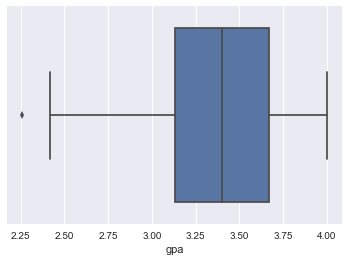

In [335]:
sns.boxplot(df_raw['gpa'])

#### Question 7. What do this plots show?

Answer: 
GRE:
A median of ~580, a range of ~520-650 for middle quartiles, and hi/lo of ~340-800. SNS picks outliers of ~220 and ~300.

GPA:
A median of ~3.35, a range of ~3.1 - 3.6 for middle quartiles, and hi/lo of ~2.4 - 4.0. SNS picks an outlier of ~2.25.

#### Question 8. Describe each distribution 

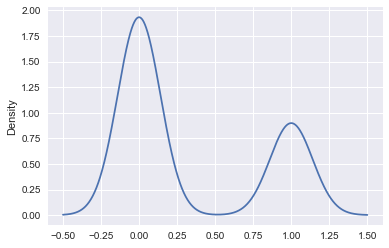

In [336]:
df_raw['admit'].plot(kind = 'density')

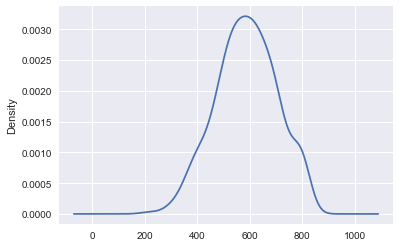

In [337]:
df_raw['gre'].plot(kind = 'density')

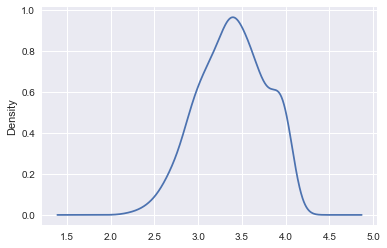

In [338]:
df_raw['gpa'].plot(kind = 'density')

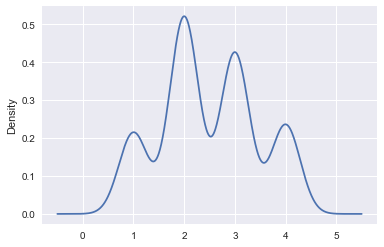

In [339]:
df_raw['prestige'].plot(kind = 'density')

In [340]:
for i in df_raw.columns:
    print("Skew of",i,":",df_raw[i].skew())
    print("Kurtosis of",i,":",df_raw[i].kurt())

Skew of admit : 0.787669147851
Kurtosis of admit : -1.38658817693
Skew of gre : -0.146046988216
Kurtosis of gre : -0.332864354651
Skew of gpa : -0.216888932969
Kurtosis of gpa : -0.563569899522
Skew of prestige : 0.0865055528971
Kurtosis of prestige : -0.90103795489


In [341]:
df_raw['prestige'].value_counts()

2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

GRE and GPA appear normally distributed with mild skews due to untreated outliers. Admit is a categorical variable, thus not helpful to analyze in this context. Prestige is numeric, but also categorical in nature (4 distinct categories). 

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: I believe so, in that if one were to perform analyses off of gre/gpa scores with respect to admit/prestige (categoricals), the results would be accurate. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, treatment for outliers would be the smartest approach. Outliers naturally offset the distribution's skew and cause inaccurate mean/median values representative of the population. One could identify a threshold (say, using boxplot method) to identify outliers, then drop their data rows. 

#### Question 11. Which of our variables are potentially colinear? 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018B2C940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000018E84BA8>]], dtype=object)

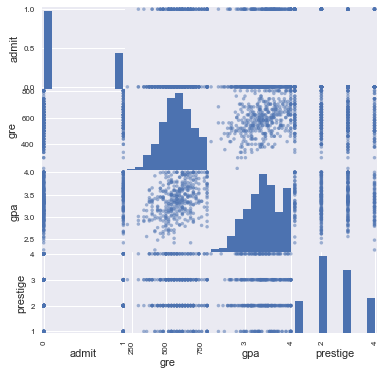

In [342]:
pd.scatter_matrix(df_raw, figsize=(6, 6))


In [343]:
df_raw_corr = df_raw.corr()
df_raw_corr

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Potentially gre/gpa as colinear variables, but given the distribution, these two variables do not appear to be colinear.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: First, investigate the data set with respect to admission rates 'admit' and undergraduate 'prestige', identifying macro trends about distribution, skew/kurtosis, and potential outliers. After treating the data set, build a simple chart that estimates prestige based on admission rate. 


[given the question doesn't specify bringing in gre/gpa as part of this (literally just asks for admit rates vs. prestige), the answer above does not include and is quite simple. One could look at relationship between gpa and gre compared to these two easily.]

#### Question 14. What is your hypothesis? 

Answer: That high ranking schools have low admission rates.

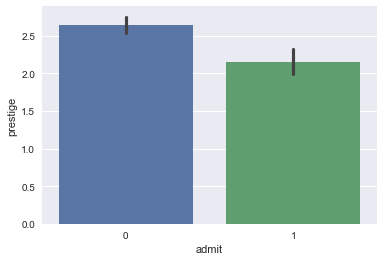

In [344]:
sns.barplot(x="admit", y="prestige", data=df_raw);

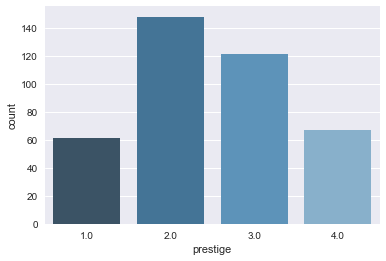

In [345]:
sns.countplot(x="prestige", data=df_raw, palette="Blues_d");

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Instead of dropping observations, depending on the context, the analyst could fill with median/mean values (numerical) or default values (categorical). Further, the analyst could isolate the observations with missing data and separately analyze, if there's some value to looking at cases where the missing data may indicate something about the observations themselves.

#### 2. Bonus: Log transform the skewed data

In [354]:
df_log = df_raw.copy()
for i in df_raw.columns:
    df_log[i] = df_raw[i]
    df_log[i] = df_log[i].apply(np.log)
df_log['admit'] = df_raw['admit']  # set admit back to original

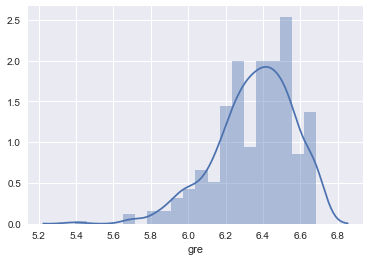

In [356]:
sns.distplot(df_log['gre']) #Log version, GRE example

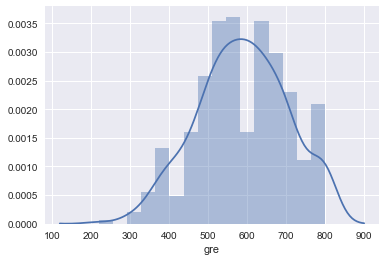

In [357]:
sns.distplot(df_raw['gre']) #vs RAW, GRE example

#### 3. Advanced: Impute missing data